## Complex Data Structures with Trees##

### Use Python dictionary to implement a stack ##

In [5]:
### Creating an empty list called stack
stack = []

### append() function to add element in the stack
## appends will add at the end just like how things get added in a stack
stack.append('a')
stack.append('b')
stack.append('c')

print('Initial stack')
print(stack)

## pop() function to remove items from the end of the stack
## element pop from stack in LIFO order
# print('\nElements popped from stack:')
print(stack.pop())
print(stack.pop())
print(stack.pop())

print('\nStack after elements are popped:')
print(stack)

# # uncommenting print(stack.pop()) -> will cause an IndexError as the stack is now empty

### Similar implementation for queue
queue = []
queue.append('a')
queue.append('b')
queue.append('c')
print("Initial queue")
print(queue)
print("\nElements dequeued from queue")
print(queue.pop(0))
print(queue.pop(0))
print(queue.pop(0))
print("\nQueue after removing elements")
print(queue)

Initial stack
['a', 'b', 'c']
c
b
a

Stack after elements are popped:
[]
Initial queue
['a', 'b', 'c']

Elements dequeued from queue
a
b
c

Queue after removing elements
[]


### Use Python dictionary to implement a **graph** ##

In [6]:
graph = { "A" : ["B"],
          "B" : ["A", "C"],
          "C" : ["B", "D", "E"],
          "D" : ["C", "E", "F", "G"],
          "E" : ["C", "D", "F"],
          "F" : ["D", "E"],
          "G" : ["D"]
        }

### Question:
How many edges does the graph dictionary have?

A) 3
B) 4
C) 7
D) 8

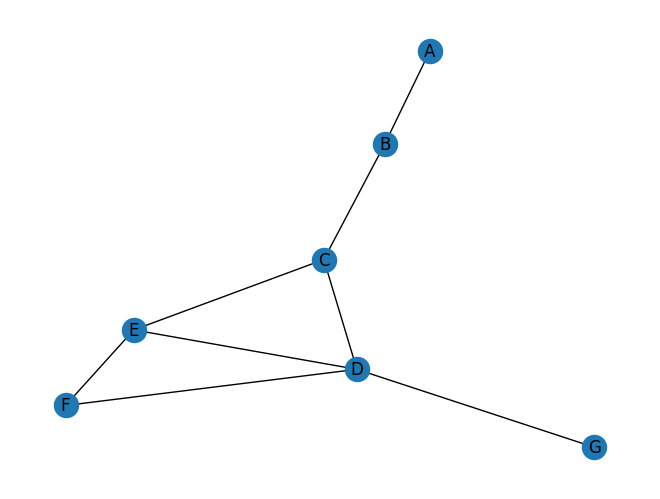

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('E', 'F')]


In [7]:
#! pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph(graph)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
plt.show()
print(G.edges)

## Processing Tree-like Data
In this hands-on exercise, we study means to store and manipulate information about hierarchy relationship among primates. We consider the following taxonomy showing a selection of primate taxa, where child taxa are indented underneath their parent:

* Primates
    - Haplorrhini
        - Simiiformes
            - Hominoidea
                - Pan troglodytes
                - Pongo abelii
        - Tarsiiformes
            - Tarsius tarsier
    - Strepsirrhini
         - Lorisidae
             - Loris tardigradus
         - Lemuriformes
             - Allocebus trichotis
         - Lorisiformes
            - Galago alleni
            - Galago moholi
            

**The following dictionary represents the Child-to-Parent relations of this tree:**


In [8]:
# The dictionary tax_dict holds all the child-parent relations
# so that each key represents a child and the corresponding value
# represents the parent of that child
tax_dict = {
'Pan troglodytes' : 'Hominoidea',       'Pongo abelii' : 'Hominoidea',
'Hominoidea' :  'Simiiformes',          'Simiiformes' : 'Haplorrhini',
'Tarsius tarsier' : 'Tarsiiformes',     'Haplorrhini' : 'Primates',
'Tarsiiformes' : 'Haplorrhini',         'Loris tardigradus' : 'Lorisidae',
'Lorisidae' : 'Strepsirrhini',          'Strepsirrhini' : 'Primates',
'Allocebus trichotis' : 'Lemuriformes', 'Lemuriformes' : 'Strepsirrhini',
'Galago alleni' : 'Lorisiformes',       'Lorisiformes' : 'Strepsirrhini',
'Galago moholi' : 'Lorisiformes'
}

The following function is for finding exactly three parents for an organism. This function uses a dictionary in which the key is an organism whose value is the parent of that organism. Method dict.get(key)

In [16]:
# Function works with taxon that has exactly 3 ancestors
def get_3_ancestors(taxon):
    """Non-recursive function that returns three ancestors for the
       taxon passed as argument"""
    # get() returns the value for the given key in the dictionary
    first_parent = tax_dict.get(taxon)
    second_parent = tax_dict.get(first_parent)
    third_parent = tax_dict.get(second_parent)
    return[first_parent, second_parent, third_parent]

print(get_3_ancestors('Strepsirrhini'))

['Primates', None, None]


In [17]:
def get_all_ancestors(taxon):
    ancestors = [] #contain all the ancestors result

    while taxon in tax_dict: #for, while
        parent = tax_dict.get(taxon)
        # print("Parent: " + parent)
        ancestors.append(parent)
        taxon = parent #changes the taxon to parent

    return ancestors

print(get_all_ancestors('Hominoidea'))

['Simiiformes', 'Haplorrhini', 'Primates']


**Another way to representing the tree above is to create a data structure to show the Parent-to-Child relations of this tree:**
Here we use a dictionary where the key is the parent and the value is a list of all its children: parent -> [children]

In [11]:
# The dictionary new_tax_dict holds all parent child relations
#   so that each key represents a parent and its value is
#   a list of all children of that parent

# For example: 'Primates' is a parent that is stored as the key
#   and 'Haplorrhini' and 'Strepsirrhini' are the corresponding
#   children stored in a list that is the value of the key 'Primates'
new_tax_dict = {
    'Primates': ['Haplorrhini', 'Strepsirrhini'],
    'Haplorrhini': ['Tarsiiformes', 'Simiiformes'],
    'Tarsiiformes': ['Tarsius tarsier'],
    'Simiiformes': ['Hominoidea'],
    'Hominoidea': ['Pongo abelii', 'Pan troglodytes'],
    'Strepsirrhini': ['Lorisidae', 'Lemuriformes', 'Lorisiformes'],
    'Lorisidae': ['Loris tardigradus'],
    'Lemuriformes': ['Allocebus trichotis'],
    'Lorisiformes': ['Galago alleni','Galago moholi']

}

The following is an iterative function that returns a list of all the children and grandchildren of the taxon which is given as the argument. Run the cell below. Uncomment the print statements to see how a stack data structure works in finding all the children.

In [14]:
def get_children(taxon):
    children = [] #result -- the children

    stack = [taxon] # list for the stack to go through
    #the only information/item I have is taxon so I am adding that to a stack
    print ("First stack: " + str(stack))
    print()

    while len(stack) != 0:
        current_taxon = stack.pop() #remove the last item that I added or the parent I want to look at
        print("Parent or Child that was Popped: " + current_taxon)

        #looks all the children that are from the current_taxon or parent
        #if there is no child, then it returns an empty list
        current_taxon_children = new_tax_dict.get(current_taxon, [])
        print("Child(ren) of the Parent: " + str(current_taxon_children))

        #the reason we are extending is because we need to find all the children for the children
        stack.extend (current_taxon_children)
        print("Stack: " + str(stack))

        #append the parent to the children result
        children.append(current_taxon)
        print("Children: " + str(children))

        print()

    return (str(children[1:]))


print(get_children('Strepsirrhini'))

First stack: ['Strepsirrhini']

Parent or Child that was Popped: Strepsirrhini
Child(ren) of the Parent: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Stack: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Children: ['Strepsirrhini']

Parent or Child that was Popped: Lorisiformes
Child(ren) of the Parent: ['Galago alleni', 'Galago moholi']
Stack: ['Lorisidae', 'Lemuriformes', 'Galago alleni', 'Galago moholi']
Children: ['Strepsirrhini', 'Lorisiformes']

Parent or Child that was Popped: Galago moholi
Child(ren) of the Parent: []
Stack: ['Lorisidae', 'Lemuriformes', 'Galago alleni']
Children: ['Strepsirrhini', 'Lorisiformes', 'Galago moholi']

Parent or Child that was Popped: Galago alleni
Child(ren) of the Parent: []
Stack: ['Lorisidae', 'Lemuriformes']
Children: ['Strepsirrhini', 'Lorisiformes', 'Galago moholi', 'Galago alleni']

Parent or Child that was Popped: Lemuriformes
Child(ren) of the Parent: ['Allocebus trichotis']
Stack: ['Lorisidae', 'Allocebus trichotis']
Children: ['Strepsir

In [15]:
def get_children(taxon):
    children = [] #result -- the children

    queue = [taxon] # list for the stack to go through
    #the only information/item I have is taxon so I am adding that to a stack
    print ("First queue: " + str(queue))
    print()

    while len(queue) != 0:
        current_taxon = queue.pop(0) #remove the last item that I added or the parent I want to look at
        print("Parent or Child that was Popped: " + current_taxon)

        #looks all the children that are from the current_taxon or parent
        #if there is no child, then it returns an empty list
        current_taxon_children = new_tax_dict.get(current_taxon, [])
        print("Child(ren) of the Parent: " + str(current_taxon_children))

        #the reason we are extending is because we need to find all the children for the children
        queue.extend (current_taxon_children)
        print("Queue: " + str(queue))

        #append the parent to the children result
        children.append(current_taxon)
        print("Children: " + str(children))

        print()

    return (str(children[1:]))


print(get_children('Strepsirrhini'))


First queue: ['Strepsirrhini']

Parent or Child that was Popped: Strepsirrhini
Child(ren) of the Parent: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Queue: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Children: ['Strepsirrhini']

Parent or Child that was Popped: Lorisidae
Child(ren) of the Parent: ['Loris tardigradus']
Queue: ['Lemuriformes', 'Lorisiformes', 'Loris tardigradus']
Children: ['Strepsirrhini', 'Lorisidae']

Parent or Child that was Popped: Lemuriformes
Child(ren) of the Parent: ['Allocebus trichotis']
Queue: ['Lorisiformes', 'Loris tardigradus', 'Allocebus trichotis']
Children: ['Strepsirrhini', 'Lorisidae', 'Lemuriformes']

Parent or Child that was Popped: Lorisiformes
Child(ren) of the Parent: ['Galago alleni', 'Galago moholi']
Queue: ['Loris tardigradus', 'Allocebus trichotis', 'Galago alleni', 'Galago moholi']
Children: ['Strepsirrhini', 'Lorisidae', 'Lemuriformes', 'Lorisiformes']

Parent or Child that was Popped: Loris tardigradus
Child(ren) of the Parent: []
Queu